## K means clusters on Banking Data set

Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Data Analytics Assesment

/content/drive/MyDrive/Colab Notebooks/Data Analytics Assesment


In [ ]:
df = pd.read_csv("bank.csv")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# Sklearn - Finding amount of clusters
import sklearn
from sklearn.cluster import KMeans

df1 = df[['age','balance']]



In [ ]:
#Step 1: initialise the clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=1234)


In [ ]:
# Step 2: fit and predict
pred_kmeans = kmeans.fit_predict(df1)


In [ ]:
# Step 3: intergrate the cluster assignment to the orginal data
newdf = df1.assign(Cluster=pred_kmeans)

newdf.head(10)

,age,balance,Cluster
0,59,2343,2
1,56,45,0
2,41,1270,0
3,55,2476,2
4,54,184,0
5,42,0,0
6,56,830,0
7,60,545,0
8,37,1,0
9,28,5090,2


In [ ]:
print(set(pred_kmeans))

{0, 1, 2, 3, 4}


In [ ]:
#kmeans cluster centres

kmeans.cluster_centers_

array([[4.03861981e+01, 4.67746619e+02],
       [4.60000000e+01, 2.33255634e+04],
       [4.40976838e+01, 3.40340987e+03],
       [4.37802691e+01, 9.21980045e+03],
       [6.00000000e+01, 6.09691250e+04]])

In [ ]:
# fix the scaling

import sklearn.preprocessing as pp

scaler = pp.MinMaxScaler()

X = scaler.fit_transform(df1)

In [ ]:
np.max(X, axis=0)

array([1., 1.])

In [ ]:
# redo the pred_kmeans
kmeans = KMeans(n_clusters=5)
pred_kmeans = kmeans.fit_predict(X)

In [ ]:
# Inverse transform
centers_rw = scaler.inverse_transform(kmeans.cluster_centers_)

Text(0.5, 1.0, 'KMeans with n_clusters = 5')

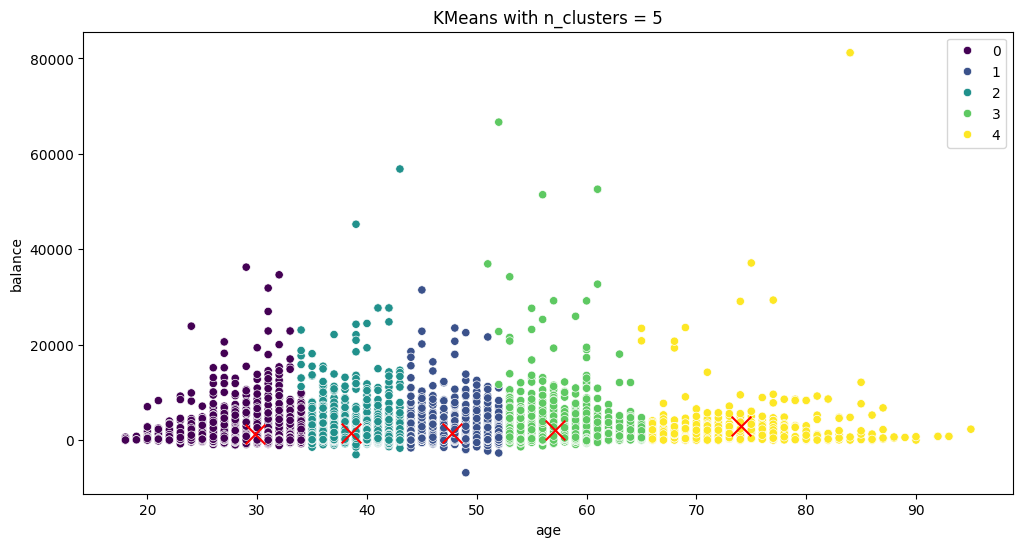

In [ ]:
#Set the size of the figure
plt.figure(figsize=(12,6))

#Plotting the clusters
sns.scatterplot(x='age', y='balance', data=df1, hue=pred_kmeans, palette='viridis', legend='auto')

#Plotting the cluster centers
plt.scatter(centers_rw[:,0],centers_rw[:,1], color="red",s=200, marker='x')

plt.title('KMeans with n_clusters = 5')

In [ ]:
newdf

,age,balance,Cluster
0,59,2343,2
1,56,45,0
2,41,1270,0
3,55,2476,2
4,54,184,0
...,...,...,...
11157,33,1,0
11158,39,733,0
11159,32,29,0
11160,43,0,0


In [ ]:
newdf.groupby('Cluster').describe()

age                                                       balance  \
          count       mean        std   min    25%   50%    75%   max   count   
Cluster                                                                         
0        8637.0  40.376172  11.404622  18.0  32.00  38.0  48.00  93.0  8637.0   
1          71.0  46.000000  13.493914  24.0  34.00  45.0  55.50  77.0    71.0   
2        2000.0  44.115000  13.073494  20.0  34.00  42.0  53.00  95.0  2000.0   
3         446.0  43.780269  12.910101  20.0  33.25  41.5  53.00  87.0   446.0   
4           8.0  60.000000  16.750267  39.0  49.75  58.5  66.75  84.0     8.0   

                                                                           \
                 mean           std      min       25%      50%       75%   
Cluster                                                                     
0          465.361005    555.810198  -6847.0     54.00    316.0    786.00   
1        23325.563380   5285.430556  16397.0  19292.50  22520.0  26456.00   
2         3393.162500   1137.529037   1937.0   2453.00   3116.0   4150.25   
3         9219.800448   2349.358553   6332.0   7281.75   8556.0  10842.50   
4        60969.125000  13870.976579  45248.0  52300.00  54709.0  70290.75   

                  
             max  
Cluster           
0         1934.0  
1        37127.0  
2         6307.0  
3        15841.0  
4        81204.0

# Making a more educated decision

Elbow Method

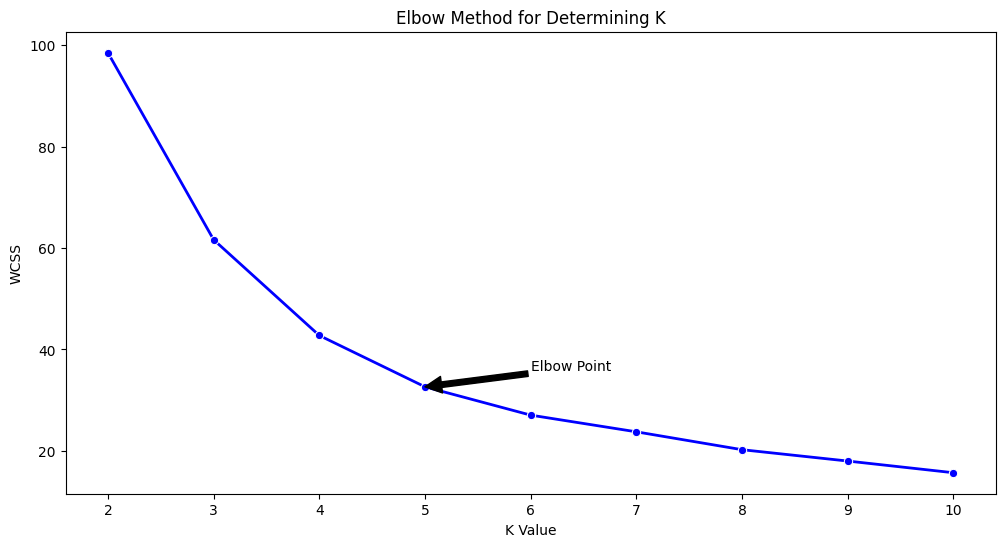

In [ ]:
# Elbow Method

inertia_scores = []

for k in range(2,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  inertia_scores.append(kmeans.inertia_)

  # Creating a DataFrame for Seaborn plotting
df_inertia= pd.DataFrame({'K Value':range(2,11),'WCSS': inertia_scores})

# Creating the figure and axis object
fig, ax = plt.subplots(figsize=(12,6))

# Plotting with Seaborn, assigning the Axes object to ax
sns.lineplot(data = df_inertia, x='K Value', y ='WCSS', linewidth = 2, color='blue',marker="o",ax= ax)

# Annotating the "elbow" point
x_val = 5
y_val = df_inertia.loc[df_inertia['K Value'] == x_val, 'WCSS'].values[0]
ax.annotate("Elbow Point", xy=(x_val,y_val), xytext=(6, y_val + 0.1*y_val), arrowprops=dict(facecolor='black'))

# Using ax.set() to set titles, labels, and ticks
ax.set(
    title="Elbow Method for Determining K",
    xlabel="K Value",
    ylabel="WCSS",
    xticks=np.arange(2, 11, 1));

In [ ]:
# kneed to find optimal K value
!pip install kneed

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(2,11), inertia_scores, curve='convex', direction='decreasing')

kl.elbow

4

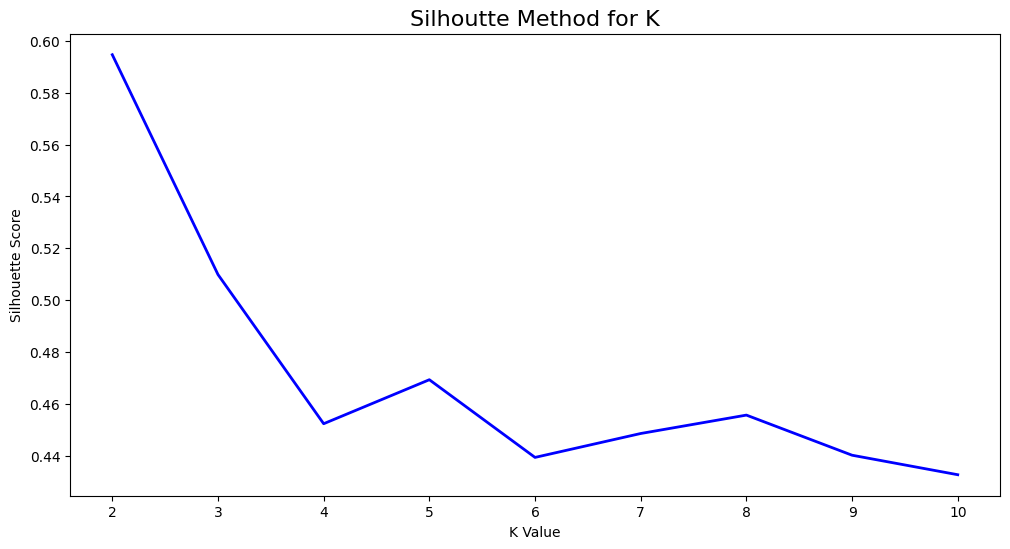

In [ ]:
# metric for evaluation
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  silhouette_scores.append(silhouette_score(X, kmeans.predict(X)))

plt.figure(figsize=(12, 6))
plt.plot(range(2,11), silhouette_scores, linewidth=2, color='blue')
plt.xlabel("K Value")
plt.xticks(np.arange(2,11,1))
plt.ylabel("Silhouette Score")
plt.title("Silhoutte Method for K", fontsize=16)
plt.show()

Outcomes - Elbow method is suggesting 5 but silhouette score showing 2

Lets see what two clusters would look like

In [ ]:
# redo the pred_kmeans
kmeans = KMeans(n_clusters=2)
pred_kmeans = kmeans.fit_predict(X)

In [ ]:
# Inverse transform
centers_rw = scaler.inverse_transform(kmeans.cluster_centers_)

Text(0.5, 1.0, 'KMeans with n_clusters = 2')

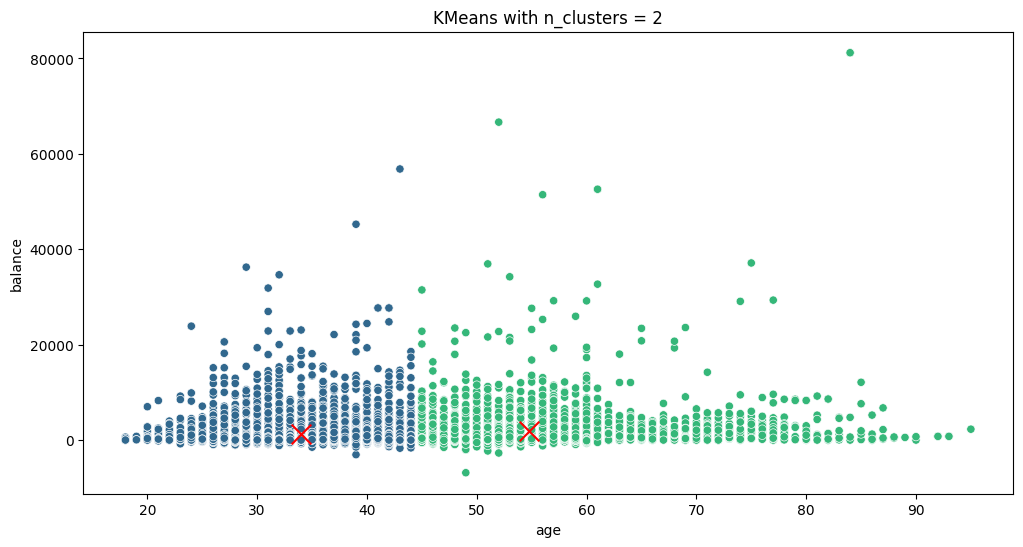

In [ ]:
#Set the size of the figure
plt.figure(figsize=(12,6))

#Plotting the clusters
sns.scatterplot(x='age', y='balance', data=df1, hue=pred_kmeans, palette='viridis', legend=None)

#Plotting the cluster centers
plt.scatter(centers_rw[:,0],centers_rw[:,1], color="red",s=200, marker='x')

plt.title('KMeans with n_clusters = 2')

Transforming variables and adding further columns

In [ ]:
# Transforming variables for more details analysis
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Task 2: Cluster by more variables

Business is happy with your first results. However, they would like to integrate Housing status as well. They believe that all 3 variables are equally important. Also, they tell you that the number of clusters should stay the same, i.e. continue to be 5.

In [ ]:
# convert House to binary

df.housing.replace(('yes', 'no'), (1, 0), inplace=True)

In [ ]:
# define df

df1 = df[['age', 'balance', 'housing',]].copy()

In [ ]:
# scale input and run k-means
X = scaler.fit_transform(df1)

kmeans = KMeans(n_clusters=5)
pred_kmeans = kmeans.fit_predict(X)

df1['cluster'] = pred_kmeans

df1.groupby('cluster').describe()

age                                                    balance  \
          count       mean       std   min   25%   50%   75%   max   count   
cluster                                                                      
0        2918.0  31.916724  4.867978  18.0  29.0  32.0  36.0  40.0  2918.0   
1        1826.0  49.691128  5.968401  42.0  45.0  49.0  54.0  78.0  1826.0   
2         904.0  66.171460  8.034286  56.0  60.0  63.0  72.0  95.0   904.0   
3        2059.0  48.923264  4.850930  41.0  45.0  49.0  53.0  57.0  2059.0   
4        3455.0  33.519537  4.494171  20.0  30.0  34.0  37.0  41.0  3455.0   

                      ...                  housing                           \
                mean  ...     75%      max   count mean  std  min  25%  50%   
cluster               ...                                                     
0        1485.559630  ...  1698.5  34646.0  2918.0  0.0  0.0  0.0  0.0  0.0   
1        1474.110077  ...  1671.5  36935.0  1826.0  1.0  0.0  1.0  1.0  1.0   
2        2580.116150  ...  2812.0  81204.0   904.0  0.0  0.0  0.0  0.0  0.0   
3        1800.735794  ...  2116.5  66653.0  2059.0  0.0  0.0  0.0  0.0  0.0   
4        1156.242836  ...  1245.5  45248.0  3455.0  1.0  0.0  1.0  1.0  1.0   

                   
         75%  max  
cluster            
0        0.0  0.0  
1        1.0  1.0  
2        0.0  0.0  
3        0.0  0.0  
4        1.0  1.0  

[5 rows x 24 columns]

In [ ]:
# compare these cluster patterns

px.scatter_3d(df1[df1['cluster'].isin([0,1,2,3,4])], x='age', y='balance', z='housing', color='cluster')

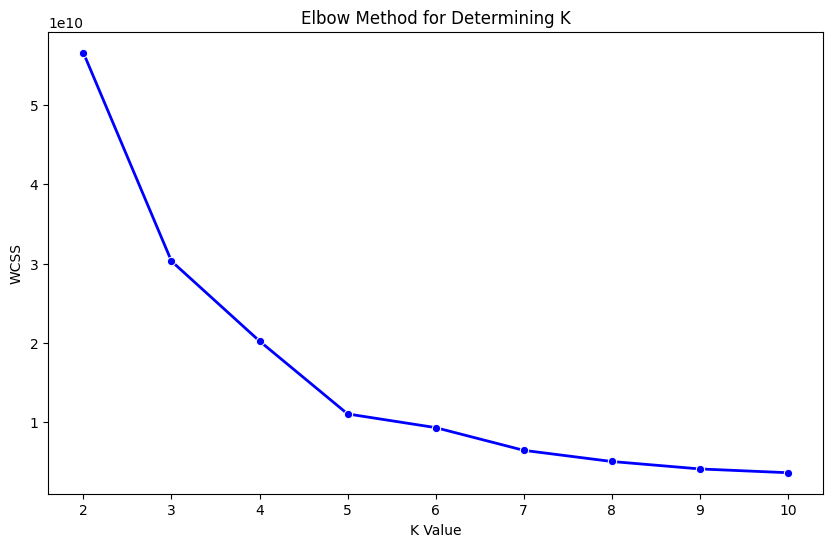

In [ ]:
# Elbow Method
inertia_scores = []
K_range = range(2, 11)  # Check for k values from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=1234)  # Initialize KMeans with current k
    kmeans.fit(df1)  # Fit the model to your data (df1)
    inertia_scores.append(kmeans.inertia_)  # Append the inertia to the list

# Create a DataFrame for plotting
elbow_data = pd.DataFrame({'K Value': K_range, 'WCSS': inertia_scores})

# Visualize the Elbow method
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=elbow_data, x='K Value', y='WCSS', linewidth=2, color='blue', marker='o', ax=ax)

ax.set(title="Elbow Method for Determining K", xlabel="K Value", ylabel="WCSS", xticks=K_range)

plt.show()